In [1]:
import numpy as np
import matplotlib.pyplot as plt
import standard_atmosphere as sa
%matplotlib inline

In [6]:
psi = np.load('3d_ideal_psi.npy')

In [3]:
# Create a 3d domain
nx = 51
ny = 51
nz = 31
Lx = 12.5
Ly = 12.5
H = 9

x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
z = np.linspace(0, H, nz)

dx = x[1] - x[0]
dy = y[1] - y[0]
dz = z[1] - z[0]

psi_ig = 10
psi = np.ones((nx, ny, nz)) * psi_ig

sigma2 = (dx/dy) **2
xs, ys, zs = np.meshgrid(x, y, z, indexing='ij')

pres = 101325 * (1 - 2.25569*10**(-5)*z*1000)**5.25616

Z_sa, phi_sa, T_sa, S_half_sa = sa.atmos_structure(pres)
dp = pres[1:] - pres[:-1]
dp = np.append(dp[0], dp)

r_earth = 6371e3
omega = 7.292E-5
lat = 30 + y
lat_rad = np.deg2rad(lat)
f0 = 2 * omega * (np.sin(lat_rad[0]) + np.sin(lat_rad[-1]))/2

In [8]:
'''
psi(nx, ny, nz)
'''
ug = - np.gradient(psi, y, edge_order=1, axis=1) / f0
vg = np.gradient(psi, x, edge_order=1, axis=0) / f0

Text(0.5, 0, 'x')

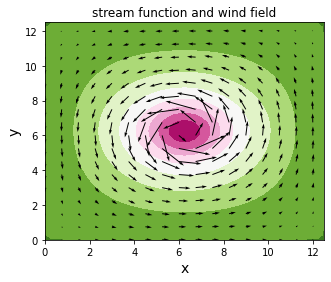

In [11]:
# Plot figures
fig, ax = plt.subplots(figsize=(5,4), sharex=True)
cs = ax.contourf(xs[:,:,10],ys[:,:,10],psi[:,:,10],cmap='PiYG') 
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)

cs = ax.quiver(xs[:,:,10][::3,::3],ys[:,:,10][::3,::3],ug[:,:,10][::3,::3], vg[:,:,10][::3,::3],
                    cmap='summer') 
ax.set_title(f'stream function and wind field')

In [13]:
Cp = 1004.7 
Rd = 287.05
T_prime = - pres/Rd * np.gradient(psi, pres, edge_order=1, axis=2) * f0
T = T_prime + T_sa[None, None, :]

Text(0.5, 1.0, 'temperature perturbation')

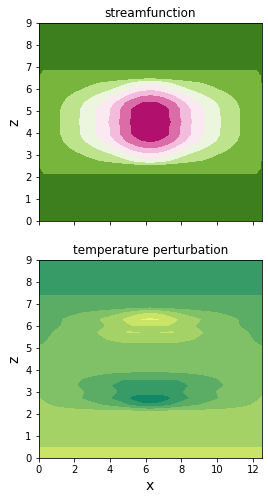

In [14]:
# Plot figures
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(4,8), sharex=True)
cs = axes[0].contourf(xs[:,25,:],zs[:,25,:],psi[:,25,:],cmap='PiYG') 
axes[0].set_title('streamfunction')
axes[0].set_ylabel('z',fontsize=14)

cs = axes[1].contourf(xs[:,25,:],zs[:,25,:],T[:,25,:],cmap='summer') 
axes[1].set_ylabel('z',fontsize=14)
axes[1].set_xlabel('x',fontsize=14)
axes[1].set_title('temperature perturbation')

In [15]:
p00 = 101325
#rho = - np.gradient(pres, z, edge_order=1) / sa.gravity_adjust(z)
#thta_prime = - f0 * pres/Rd * p00/rho * np.gradient(psi, pres, edge_order=1, axis=2)
thta = T * (p00/pres[None, None, :])**(Rd/Cp)

Text(0.5, 1.0, 'streamfunction and potential temperautre\n vertical x-section')

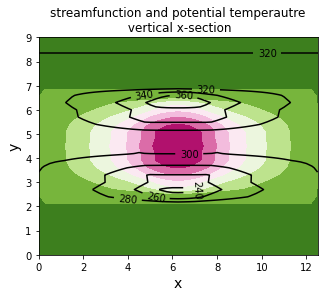

In [18]:
# Plot figures
fig, ax = plt.subplots(figsize=(5,4), sharex=True)
cs = ax.contourf(xs[:,25,:],zs[:,25,:],psi[:,25,:],cmap='PiYG') 
ax.set_xlabel('x',fontsize=14)
ax.set_ylabel('y',fontsize=14)

cs = ax.contour(xs[:,25,:],zs[:,25,:],thta[:,25,:],colors='k') 
plt.clabel(cs, fmt='%i')
ax.set_title(f'streamfunction and potential temperautre\n vertical x-section')
